### Loading and prerequesites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_vegan.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_vegan.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_vegan.pkl")

### Load dataset

In [3]:
df_sentiment = pd.read_pickle("../Data/df_sentiment.pkl")

In [4]:
# Merge the two dataframes while keeping only the rows that appear in both dataframes and only retaining the columns nexis_id, publication_year, sentiment, positive, neutral, negative, sentences, text_x
df = pd.merge(df, df_sentiment, on="nexis_id", how="inner")
df = df[["nexis_id", "publication_year_y", "text_x", "sentiment", "positive", "neutral", "negative", "sentences"]]

# Rename the column publication_year_y to publication_year
df = df.rename(columns={"publication_year_y": "publication_year"})

# Rename the column text_x to text
df = df.rename(columns={"text_x": "text"})

df.head()

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
0,5SM3THB1DXFJ50MP0000000,2018,Fleisch aus dem Labor ist noch eine Zukunftsvi...,neutral,0.0,43.0,1.0,44.0
1,5WJBFTV1JB0GF2P80000000,2019,Frisch aus dem Labor: In den USA stellen Start...,neutral,1.0,46.0,1.0,48.0
2,5SF7WFH1JDRRB2000000000,2018,Konsumverhalten Hamburger aus dem Labor? Das ...,neutral,3.0,32.0,0.0,35.0
3,5Y65XJM1JBN972W70000000,2020,Die Micarna kann ihre Insektenprodukte in den ...,neutral,1.0,50.0,3.0,54.0
4,609WCCB1JBN971TW0000000,2020,Bis vor kurzem war das Szenario in der Schweiz...,neutral,1.0,69.0,4.0,74.0


### General overview

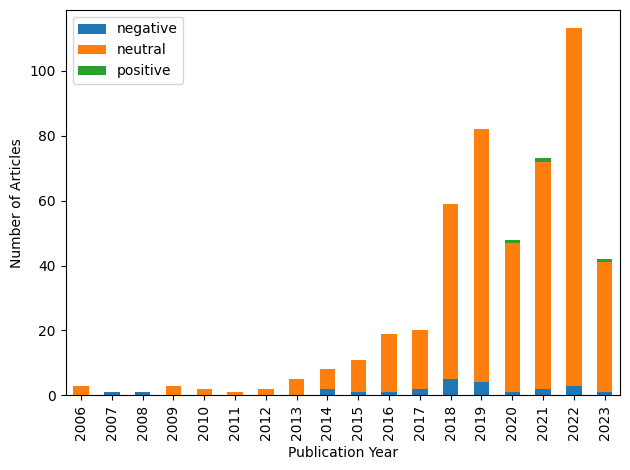

In [5]:
# Group the dataframe by publication_year and sentiment
grouped_df = df.groupby(['publication_year', 'sentiment']).size().unstack()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_vegan_per_article_stacked_barchart.png')

# Show the plot
plt.show()

C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.193
Model:                                  OLS   Adj. R-squared:                  0.142
Method:                       Least Squares   F-statistic:                     3.824
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):             0.0682
Time:                              09:57:15   Log-Likelihood:                -2.2832
No. Observations:                        18   AIC:                             8.566
Df Residuals:                            16   BIC:                             10.35
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

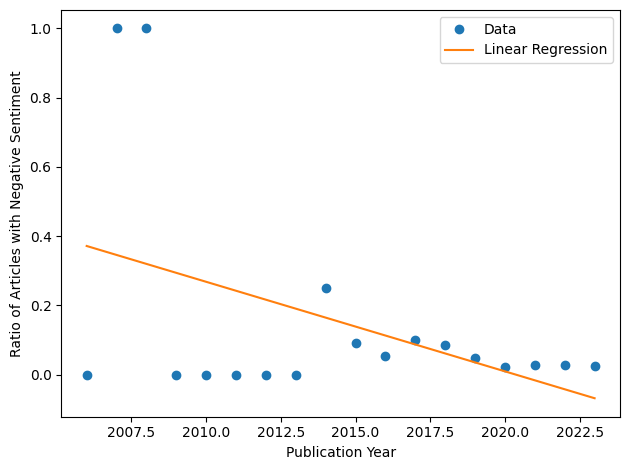

In [6]:
# Visualize the ratio of articles with negative sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with negative sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'negative').sum()})

# Calculate the ratio of articles with negative sentiment to total articles for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_vegan_articles_ratio.png')
plt.show()

C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.340
Model:                                  OLS   Adj. R-squared:                  0.299
Method:                       Least Squares   F-statistic:                     8.257
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):             0.0110
Time:                              09:57:15   Log-Likelihood:                 66.392
No. Observations:                        18   AIC:                            -128.8
Df Residuals:                            16   BIC:                            -127.0
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

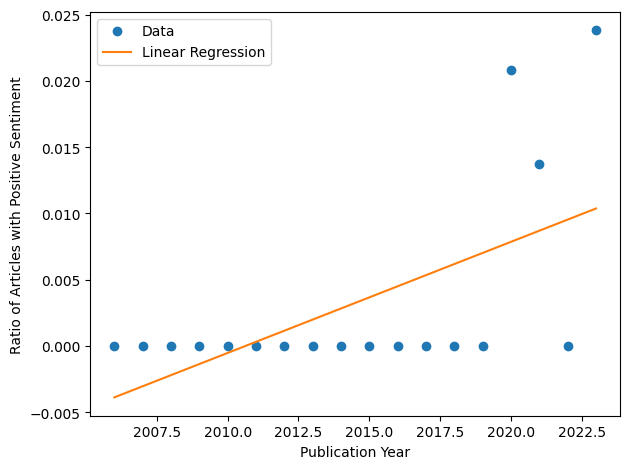

In [7]:
# Visualize the ratio of articles with positive sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with positive sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'positive').sum()})

# Calculate the ratio of articles with positive sentiment to total articles for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_vegan_articles_ratio.png')
plt.show()

C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.182
Model:                                 OLS   Adj. R-squared:                  0.131
Method:                      Least Squares   F-statistic:                     3.562
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):             0.0774
Time:                             09:57:15   Log-Likelihood:                -2.3279
No. Observations:                       18   AIC:                             8.656
Df Residuals:                           16   BIC:                             10.44
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

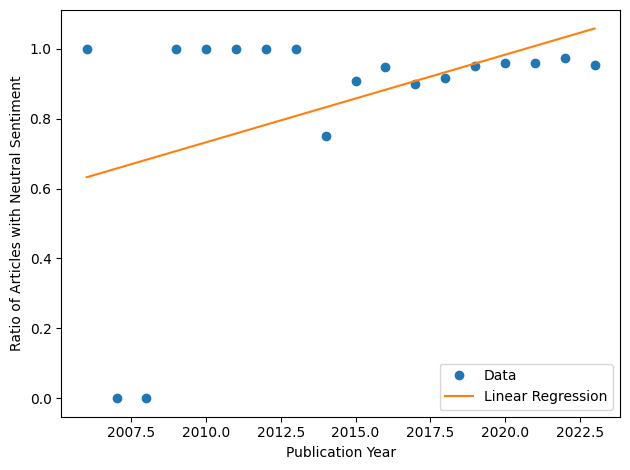

In [8]:
# Visualize the ratio of articles with neutral sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with neutral sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'neutral').sum()})

# Calculate the ratio of articles with neutral sentiment to total articles for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_vegan_articles_ratio.png')
plt.show()

### Further analysis of positive articles

In [9]:
positive_articles = df[df['sentiment'] == 'positive']
positive_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
53,60YG3FC1DY2BS0NC0000000,2020,Das finde ich super! Leider vergisst man oft d...,positive,3.0,11.0,15.0,29.0
82,67JBGC51JDMNJ06M0000000,2023,Die Zunahme der Weltbevölkerung und geänderte ...,positive,1.0,13.0,0.0,14.0
96,64CGHB91DY69V2HP0000000,2021,"I. Tolkien, ein gläubiger Katholik, leitete se...",positive,14.0,263.0,21.0,298.0


### Further analysis of negative articles

In [10]:
negative_articles = df[df['sentiment'] == 'negative']
negative_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
30,61JHRRV1DY69V4BF0000000,2020,MMeine Tochter ist 18 Jahre alt. Früher habe i...,negative,2.0,25.0,18.0,45.0
72,5V7H9J01JBK9206P0000000,2019,Was Vegetarier essen und was mit Low Carb geme...,negative,1.0,37.0,5.0,43.0
90,5S4KCWF1DXKM721N0000000,2018,"Neuhausen. ,Das Thema ist gegessen"" nennt Ecco...",negative,1.0,19.0,4.0,24.0
93,5MX24501DYJRP0SX0000000,2017,"""Es ist absurd, ein ganzes Huhn aufzuziehen, n...",negative,7.0,363.0,19.0,389.0
115,5T6JWWS1JCR4R5250000000,2018,Urlaub? Wie langweilig. Dieser Tage kommt man ...,negative,3.0,10.0,2.0,15.0
183,5WYPY101F07YK18P0000000,2019,Text von Corinna Baier und Elisabeth Krafft Se...,negative,16.0,216.0,30.0,262.0
206,5HVWGX51DYK6Y4610000000,2016,Tomatensaft An Bord trinken viele Passagiere T...,negative,1.0,34.0,7.0,42.0
210,64S3BPV1DYK6Y1YG0000000,2022,von Marie von der Tann Katzen und Hunde sind F...,negative,5.0,48.0,14.0,67.0
230,6752NNV1JBR8438B0000000,2022,VON Doch ein solches fleischloses Steak zu fin...,negative,2.0,18.0,6.0,26.0
258,66F0KS01F13R808B0000000,2022,Hollywood-Schauspieler James Cromwell (82) häl...,negative,1.0,8.0,6.0,15.0


### Analysis per sentence

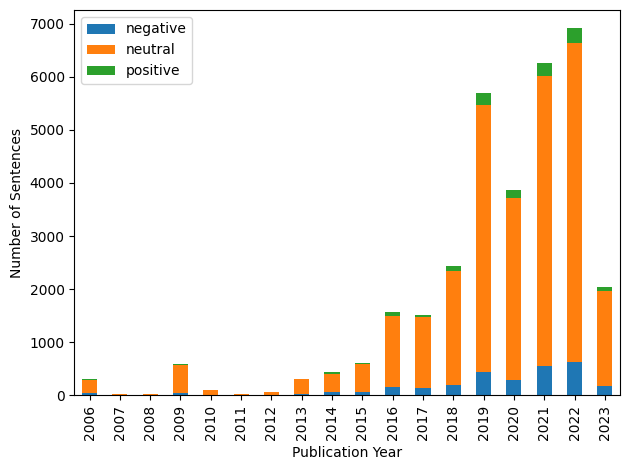

In [11]:
# Group the dataframe by publication_year and calculate the sum of positive, negative, and neutral values for each year
grouped_df = df.groupby('publication_year')[['negative', 'neutral', 'positive']].sum()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Sentences')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_vegan_per_sentence_stacked_barchart.png')

# Show the plot
plt.show()

C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.391
Model:                                  OLS   Adj. R-squared:                  0.353
Method:                       Least Squares   F-statistic:                     10.26
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):            0.00553
Time:                              09:57:16   Log-Likelihood:                 30.648
No. Observations:                        18   AIC:                            -57.30
Df Residuals:                            16   BIC:                            -55.51
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

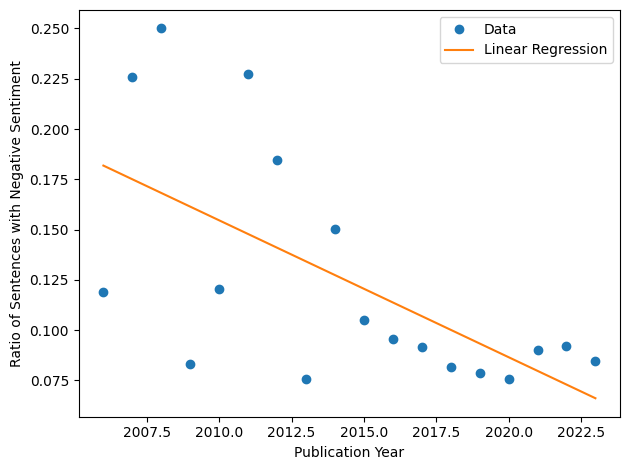

In [12]:
# Group by year and calculate the sum of negative and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'negative': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with negative sentiment to total sentences for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['negative'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_vegan_sentences_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.053
Model:                                  OLS   Adj. R-squared:                 -0.006
Method:                       Least Squares   F-statistic:                    0.8942
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.358
Time:                              09:57:16   Log-Likelihood:                 51.441
No. Observations:                        18   AIC:                            -98.88
Df Residuals:                            16   BIC:                            -97.10
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


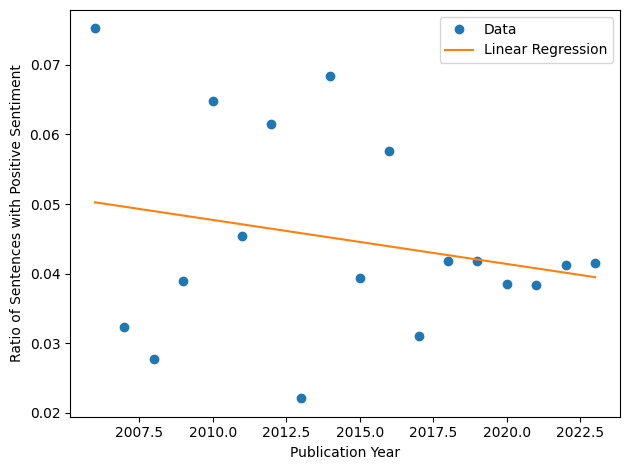

In [13]:
# Group by year and calculate the sum of positive and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'positive': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with positive sentiment to total sentences for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['positive'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_vegan_sentences_ratio.png')
plt.show()

C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.430
Model:                                 OLS   Adj. R-squared:                  0.395
Method:                      Least Squares   F-statistic:                     12.08
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):            0.00312
Time:                             09:57:16   Log-Likelihood:                 30.514
No. Observations:                       18   AIC:                            -57.03
Df Residuals:                           16   BIC:                            -55.25
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

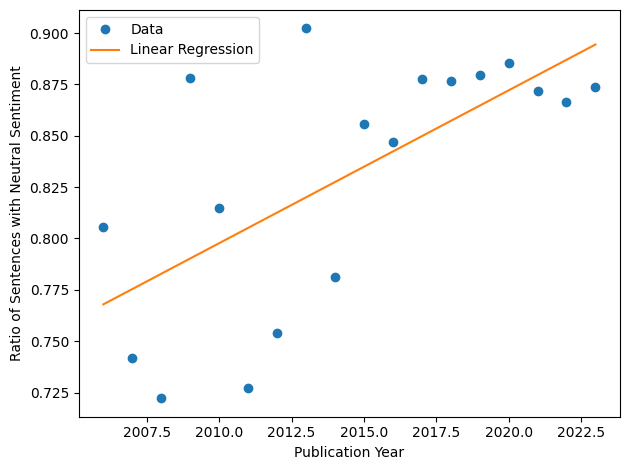

In [14]:
# Group by year and calculate the sum of neutral and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'neutral': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with neutral sentiment to total sentences for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['neutral'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_vegan_sentences_ratio.png')
plt.show()

### Explore anomalies

In [15]:
df_sorted = df.sort_values('positive', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
219,624438W1DYG1P4NF0000000,2021,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0
187,5M0CJRN1F07YK0D10000000,2016,BASF Unerwartet gutes Ergebnis BASF überrascht...,neutral,37.0,82.0,31.0,150.0
388,5YH0KVK1JCSWK0MF0000000,2020,Angesichts des aktuellen SARS-CoV-2-Ausbruchs ...,neutral,29.0,118.0,37.0,184.0
407,5X45X851F086F3VN0000000,2019,"(305. Tag, 44. Woche des Jahres) Namenstag: Ar...",neutral,21.0,305.0,7.0,333.0
146,5XVM4CJ1DY2BS0P60000000,2019,Wer am Flughafen Tokio-Haneda sein Abfluggate ...,neutral,19.0,124.0,31.0,174.0
156,66BFH441F15WB2P80000000,2022,"Mein Erweckungserlebnis war, ganz klar, das Co...",neutral,18.0,158.0,52.0,228.0
180,4M1BMF50TWXHJ2PF0000000,2006,"Fleisch, Wurst und Schinken sind die gebräuchl...",neutral,18.0,208.0,32.0,258.0
45,65C0J671DY2BS3870000000,2022,Gerade bei der Ernährung tut ein Blick über de...,neutral,18.0,144.0,34.0,196.0
268,5S7F0K91JC1002XD0000000,2018,"Deutschland USA Israel Herr Wesjohann, wie füh...",neutral,17.0,126.0,20.0,163.0
60,7VP7VXR12SG140090000000,2009,1. Reykjavik Am Abend des 13. Oktober 2008 gin...,neutral,16.0,272.0,41.0,329.0


In [16]:
df_sorted = df.sort_values('negative', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
219,624438W1DYG1P4NF0000000,2021,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0
156,66BFH441F15WB2P80000000,2022,"Mein Erweckungserlebnis war, ganz klar, das Co...",neutral,18.0,158.0,52.0,228.0
357,66FVD341DY4BY4M80000000,2022,Ein Samstagvormittag in einem Shoppingcenter i...,neutral,7.0,166.0,46.0,219.0
128,6222TJX1DY2ND3T70000000,2021,Sie sind vor zehn Jahren de facto aus der Öffe...,neutral,12.0,81.0,46.0,139.0
60,7VP7VXR12SG140090000000,2009,1. Reykjavik Am Abend des 13. Oktober 2008 gin...,neutral,16.0,272.0,41.0,329.0
388,5YH0KVK1JCSWK0MF0000000,2020,Angesichts des aktuellen SARS-CoV-2-Ausbruchs ...,neutral,29.0,118.0,37.0,184.0
417,61Y1WJ71DY69V1C30000000,2021,"Wer über Schweinezüchter schreiben möchte, mus...",neutral,2.0,194.0,35.0,231.0
45,65C0J671DY2BS3870000000,2022,Gerade bei der Ernährung tut ein Blick über de...,neutral,18.0,144.0,34.0,196.0
13,5PTH8MR1JBK924010000000,2017,"TEXT: TANJA POLLI , ANINA FRISCHKNECHT UND PET...",neutral,15.0,204.0,33.0,252.0
180,4M1BMF50TWXHJ2PF0000000,2006,"Fleisch, Wurst und Schinken sind die gebräuchl...",neutral,18.0,208.0,32.0,258.0
